In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


#### Проверяем формат столбцов

In [3]:
print(df.dtypes)
print(df.info())

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB
None


#### Сразу переведем столбец "Дата" в правильный формат

In [4]:
df['Дата'] = pd.to_datetime(df['Дата'], dayfirst=True, errors='coerce')

In [5]:
print(df.dtypes)

Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object


#### Сгруппируйте данные по дате, посчитайте количество продаж

In [7]:
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index()
print(grouped_df)

         Дата  Количество
0  2018-01-02        3770
1  2018-01-03        3848
2  2018-01-04        3786
3  2018-01-05        4221
4  2018-01-06        4736
..        ...         ...
75 2018-12-04        4103
76 2018-12-05        4883
77 2018-12-06        4837
78 2018-12-07        4290
79 2018-12-08        5667

[80 rows x 2 columns]


#### Вывести несколько первых строк сгруппированных данных

In [8]:
grouped_df.head()

,Дата,Количество
0,2018-01-02,3770
1,2018-01-03,3848
2,2018-01-04,3786
3,2018-01-05,4221
4,2018-01-06,4736


#### Нарисуйте график продаж у `grouped_df`

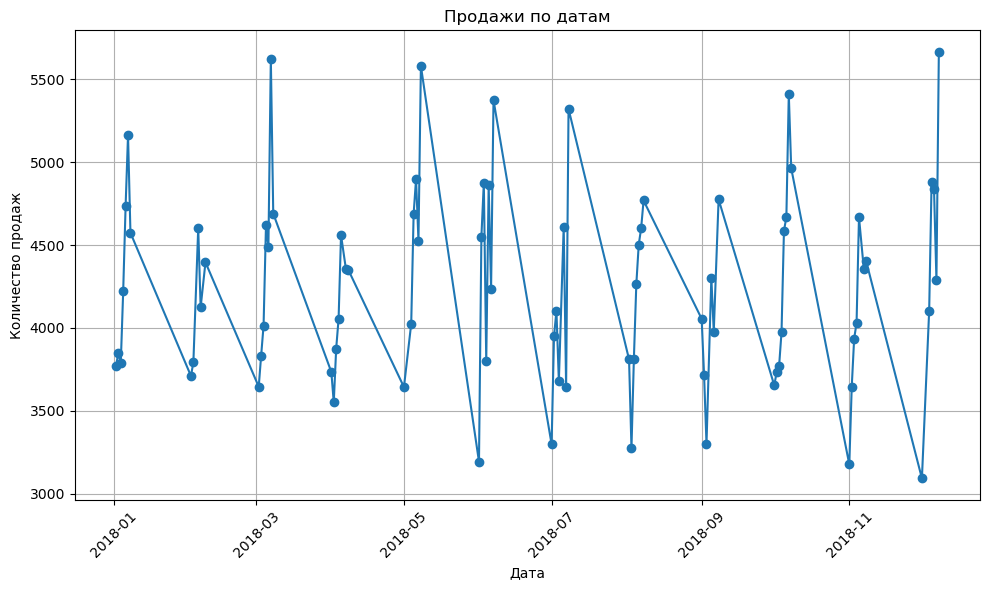

In [9]:
plt.figure(figsize=(10,6))
plt.plot(grouped_df['Дата'], grouped_df['Количество'], marker='o')
plt.title('Продажи по датам')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Опишите что вы видите на графике. Ваша задача - максимально описать график

##### Анализ данных

 ##### Общий уровень продаж:
	•	Весь период находится в диапазоне от 3000 до 5500 единиц продаж.
	•	Средний уровень колеблется в районе 4000 до 4500.

##### Тренд:
	•	Чёткого восходящего или нисходящего тренда нет.
	•	График больше напоминает стабильный ряд с высокой амплитудой колебаний.

##### Сезонность и цикличность:
	•	Можно заметить повторяющиеся всплески и падения примерно каждые 2 - 3 недели.
	•	Это может указывать на цикличность спроса (например, акции, зарплатные дни, сезонные колебания).

 ##### Пики и минимумы:
	•	Максимальные значения близки к 5500 (несколько резких пиков).
	•	Минимальные значения падают до 3000 - 3500.
	•	Самые резкие падения наблюдаются в районе весны и начала осени.

##### Шумность данных:
	•	График демонстрирует высокую вариативность (нет сглаживания).
	•	Возможны ошибки или влияние нестабильных факторов (например, нерегулярные закупки, маркетинговые кампании).

#### Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [11]:
Q1 = df['Количество'].quantile(0.25)
Q3 = df['Количество'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Количество'] < lower_bound) | (df['Количество'] > upper_bound)]

max_outlier = outliers.loc[outliers['Количество'].idxmax()]
print(max_outlier)

Дата                    NaT
Склад                     1
Контрагент      address_208
Номенклатура      product_0
Количество              200
Name: 218822, dtype: object


#### Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [13]:
unique_warehouses = df['Склад'].unique()
print(unique_warehouses)

[1 2 3 4 5]


In [19]:
# Фильтр по месяцам (6,7,8) и средам недели
df_summer_wed = df[
    (df['Дата'].dt.month.isin([6,7,8])) &
    (df['Дата'].dt.weekday == 2)
]

warehouses = [1, 2, 3, 4, 5]
df_filtered = df_summer_wed[df_summer_wed['Склад'].isin(warehouses)]

In [21]:
top_products = df_filtered.groupby(['Склад', 'Номенклатура'])['Количество'].sum().reset_index()

In [22]:
print(top_products)

     Склад Номенклатура  Количество
0        1    product_0         315
1        1    product_1         596
2        1   product_10          38
3        1   product_11          13
4        1   product_12          19
..     ...          ...         ...
109      5    product_4         119
110      5    product_5         115
111      5    product_6         195
112      5    product_7          17
113      5    product_8          19

[114 rows x 3 columns]


In [23]:
top_products_per_warehouse = top_products.sort_values(['Склад', 'Количество'], ascending=[True, False])\
                                         .groupby('Склад').first().reset_index()
print(top_products_per_warehouse)

   Склад Номенклатура  Количество
0      1    product_1         596
1      2    product_2         575
2      3    product_1         479
3      4    product_1         479
4      5    product_1         458


#### Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [27]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [28]:

weather_df = pd.read_excel('whether.xls')

print(weather_df.columns)  # Вывести все названия столбцов
print(weather_df.head()) 

Index(['# Метеостанция Астана, Казахстан, WMO_ID=35188, выборка с 01.07.2025 по 01.08.2025, все дни',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28'],
      dtype='object')
  # Метеостанция Астана, Казахстан, WMO_ID=35188, выборка с 01.07.2025 по 01.08.2025, все дни  \
0                                 # Кодировка: UTF-8                                            
1  # Информация предоставлена сайтом "Расписание ...                                            
2  # Пожалуйста, при использовании данных, любезн...                                            
3  # Обозначения метеопарам

In [34]:
weather_df = pd.read_excel('whether.xls', skiprows=100) 
print(weather_df.columns)
print(weather_df.head())

Index(['20.07.2025 23:00',               19.4,              731.8,
                      762,                0.6,                 55,
       'Штиль, безветрие',                  0,       'Unnamed: 8',
             'Unnamed: 9',     'Облаков нет.',                ' ',
            'Unnamed: 12',      'Unnamed: 13',      'Unnamed: 14',
                     26.1,      'Unnamed: 16',      'Unnamed: 17',
            'Unnamed: 18',      'Unnamed: 19',      'Unnamed: 20',
            'Unnamed: 21',                 10,      'Unnamed: 23',
            'Unnamed: 24',      'Unnamed: 25',      'Unnamed: 26',
            'Unnamed: 27',      'Unnamed: 28'],
      dtype='object')
   20.07.2025 23:00  19.4  731.8    762  0.6  55  \
0  20.07.2025 20:00  24.1  731.2  760.9 -0.2  39   
1  20.07.2025 17:00  25.8  731.4  760.9 -0.7  30   
2  20.07.2025 14:00  23.9  732.1  761.8 -0.9  36   
3  20.07.2025 11:00  21.6  733.0  763.0 -0.1  41   
4  20.07.2025 08:00  16.8  733.1  763.6  1.0  62   

              

In [35]:
weather_df.columns = ['Дата_время', 'Температура', 'Давление_мм', 'Давление_гПа', 
                      'Осадки_мм', 'Влажность_%', 'Ветер_направление', 'Ветер_скорость', 
                      'Unnamed_8', 'Unnamed_9', 'Облачность', 'Пусто_11', 'Unnamed_12', 
                      'Unnamed_13', 'Unnamed_14', 'Темп_покрытие', 'Unnamed_16', 'Unnamed_17', 
                      'Unnamed_18', 'Unnamed_19', 'Unnamed_20', 'Unnamed_21', 'Темп_покрытие_2', 
                      'Unnamed_23', 'Unnamed_24', 'Unnamed_25', 'Unnamed_26', 'Unnamed_27', 'Unnamed_28']


In [36]:
weather_df['Дата'] = pd.to_datetime(weather_df['Дата_время'], format='%d.%m.%Y %H:%M')
weather_df['Дата_день'] = weather_df['Дата'].dt.date


In [37]:
daily_temp = weather_df.groupby('Дата_день')['Температура'].mean().reset_index()
daily_temp.columns = ['Дата', 'T']


In [38]:
weather_df = pd.read_excel('whether.xls', skiprows=10)

# Переименовываем колонки 
weather_df.columns = ['Дата_время', 'Температура', 'Давление_мм', 'Давление_гПа', 
                      'Осадки_мм', 'Влажность_%', 'Ветер_направление', 'Ветер_скорость'] + \
                     [f'Unnamed_{i}' for i in range(8,29)]

# Преобразуем дату и выделим только дату без времени
weather_df['Дата'] = pd.to_datetime(weather_df['Дата_время'], format='%d.%m.%Y %H:%M')
weather_df['Дата_день'] = weather_df['Дата'].dt.date

# Группируем по дате, считаем среднюю температуру
daily_temp = weather_df.groupby('Дата_день')['Температура'].mean().reset_index()
daily_temp.columns = ['Дата', 'T']

print(daily_temp.head())

         Дата        T
0  2025-07-01  22.7750
1  2025-07-02  25.4375
2  2025-07-03  27.9000
3  2025-07-04  25.8750
4  2025-07-05  19.4250


In [40]:
# в grouped_df 'Дата' имеет тип datetime, преобразуем к дате (без времени) для точного совпадения
grouped_df['Дата'] = pd.to_datetime(grouped_df['Дата']).dt.date

# Объединяем по дате
merged_df = pd.merge(grouped_df, daily_temp, on='Дата', how='left')

print(merged_df.head())


         Дата  Количество   T
0  2018-01-02        3770 NaN
1  2018-01-03        3848 NaN
2  2018-01-04        3786 NaN
3  2018-01-05        4221 NaN
4  2018-01-06        4736 NaN


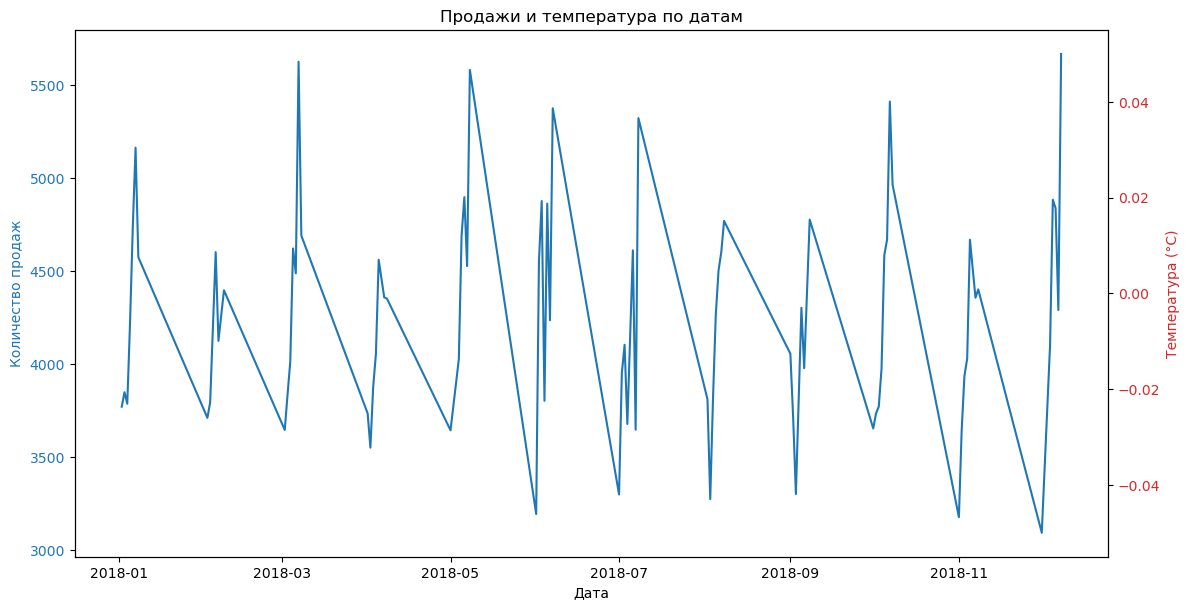

In [41]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество продаж', color='tab:blue')
ax1.plot(merged_df['Дата'], merged_df['Количество'], color='tab:blue', label='Продажи')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Температура (°C)', color='tab:red')
ax2.plot(merged_df['Дата'], merged_df['T'], color='tab:red', label='Температура')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()
plt.title('Продажи и температура по датам')
plt.show()

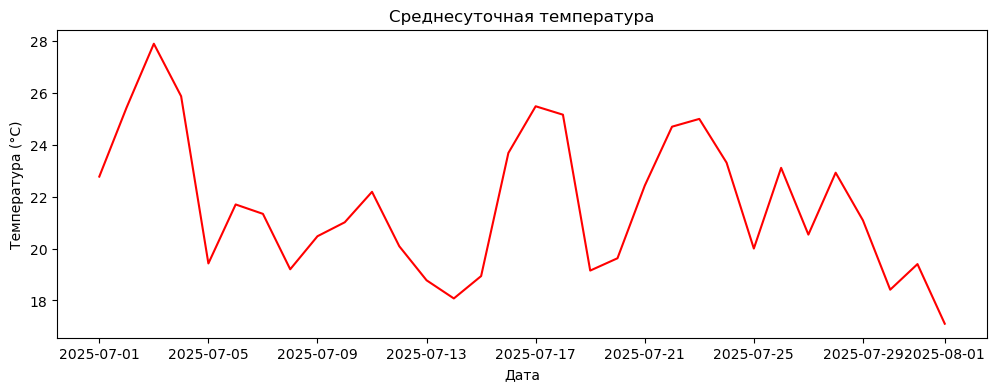

In [42]:
plt.figure(figsize=(12,4))
plt.plot(daily_temp['Дата'], daily_temp['T'], color='red')
plt.title('Среднесуточная температура')
plt.xlabel('Дата')
plt.ylabel('Температура (°C)')
plt.show()